In [ ]:
import numpy as np
import matplotlib.pyplot as plt

goal_t = 10
goal_s = 20

class Node:
    
    def __init__(self, t, s, v):
        self.var = (t, s, v)
        self.hs  = (s - goal_s)**2
        self.gs  = 0
        self.fs  = 0
        self.parent_node = None

    def isGoal(self):
        # 速度か位置が最大値を超えたらgoal
        return (self.var[0] >= goal_t) or self.var[1] >= goal_s
    
    
    
class NodeList(list):
    def find(self, x,y):
        l = [t for t in self if t.pos==(x,y)]
        return l[0] if l != [] else None
    def remove(self,node):
        del self[self.index(node)]
        

def getRefV(s):
    sarr = list(range(20))
    varr = [2,2,2,1,1,1,1,3,3,3,3,2,2,2,1,1,3,3,3,3]
    n = min(sarr, key=lambda x:abs(x-s))
    return varr[n]

def printNode(n):
    plt.xlim([0, 11])
    t = n.var[0]
    s = n.var[1]
    plt.scatter(t, s)
    plt.grid()
    plt.show()
    

if __name__ == '__main__':
    
    open_list     = NodeList()
    close_list    = NodeList()
    start_node    = Node(0, 0, 0) # t, s, v
    start_node.fs = start_node.hs
    open_list.append(start_node)
    
    
    while (True):
        
        #Openリストが空になったら解なし
        if open_list == []:
            print("there is no open list")
            break
        
        #Openリストからf*が最少のノードnを取得
        n = min(open_list, key=lambda x:x.fs)
        open_list.remove(n)
        close_list.append(n)
        
        printNode(n)
        
        #最小ノードがゴールだったら終了
        if n.isGoal():
            end_node = n
            break
            
        #f*() = g*() + h*() -> g*() = f*() - h*()
        n_gs = n.fs - n.hs
    

        # 前回速度：viから今の速度を計算
        # 前回値 +- 1だけにする、v >= 0
        vi = n.var[2]
        for v in [vi-1, vi, vi+1]:
            if (v >= 0):
                t = ti + 1
                s = si + v
                m = open_list.find(t, s, v)
                n_dgs = (getRefV(s) - v)**2
                
                if m:
                    #移動先のノードがOpenリストに格納されていた場合、
                    #より小さいf*ならばノードmのf*を更新し、親を書き換え
                    if m.fs > (n_gs + n_dgs) + m.hs:
                        m.fs = (n_gs + n_dgs) + m.hs
                        m.parent_node = n
                else:
                    m = close_list.find(t, s, v)
                    if m:
                        #移動先のノードがCloseリストに格納されていた場合、
                        #より小さいf*ならばノードmのf*を更新し、親を書き換え、かつ、Openリストに移動する
                        if m.fs > (n_gs + n_dgs) + m.hs:
                            m.fs = (n_gs + n_dgs) + m.hs
                            m.parent_node = n
                            open_list.append(m)
                            close_list.remove(m)
                        else:
                            #新規ノードならばOpenリストにノードに追加
                            m = Node(t, s, v)
                            m.fs = (n_gs + n_dgs) + m.hs
                            m.parent_node = n
                            open_list.append(m)
                





> <ipython-input-58-c1b15933fe4d>(56)<module>()
     54 
     55 
---> 56     while (True):
     57 
     58         #Openリストが空になったら解なし

ipdb> open_list


In [44]:
    sarr = list(range(0,20))
    varr = [2,2,2,1,1,1,1,3,3,3,3,2,2,2,1,1,3,3,3]
    
    print(len(varr))
#     print(varr.size)

19


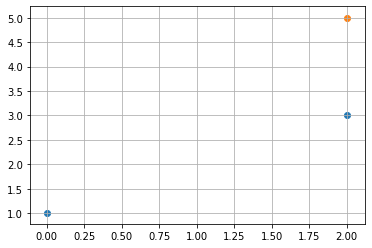

In [54]:
t = [0, 2]
s = [1, 3]
p = plt.scatter(t, s)

plt.scatter(2, 5)

plt.grid()